<a href="https://colab.research.google.com/github/kanishquetyagi/Company-Bankruptcy-Prediction/blob/main/COMPANY_BANKRUPTCY_PREDICTION(individual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING WHETHER A COMPANY WILL GO BANKRUPT OR NOT USING VARIOUS CLASSIFICATION MODELS.

In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 - ML/Week 1/Datasets/COMPANY BANKRUPTCY PREDICTION.csv')

In [4]:
#reviewing dataset
pd.set_option('display.max_columns',None)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df.shape

(6819, 96)

The dataset consist of 6819 rows and 96 columns

#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are 0 non-null values in the dataset.
There are only 3 columns with 'int' datatype while the others are of 'float' datatype.

In [7]:
#checking for null values
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

We can see there are no null values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


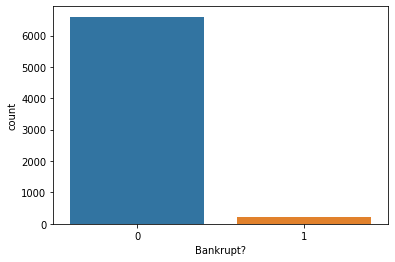

In [8]:
#Bar plot of Dependent Variable
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot('Bankrupt?',data=df)

In [9]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

We can see that there is high imbalance in dependent variable.
Only 220 out of 6819 companies are bankrupt.

Checking for correlation among the features using heatmap.

It's very difficult to get an insight from the heatmap as we have huge number of features in our dataset.
Hence, we're taking the correlated features using feature selection.

In [10]:
x = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [11]:
## Correlation
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x, 0.8)
print('correlated features: ', len(set(corr_features)) )

lista = list(corr_features)
lista.append('Bankrupt?')

set(corr_features)
len(corr_features)

correlated features:  25


25

In [12]:
corr_features

{' After-tax net Interest Rate',
 ' Cash Flow to Sales',
 ' Continuous interest rate (after tax)',
 ' Current Liabilities/Equity',
 ' Current Liability to Assets',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Equity to Long-term Liability',
 ' Gross Profit to Sales',
 ' Liability to Equity',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Operating Funds to Liability',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Operating profit/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Pre-tax net Interest Rate',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Regular Net Profit Growth Rate'}

Using feature selection we're minimised to 25 columns which are highly correlated. We'll proceed with our findings with these features.

In [13]:
df1 = df.iloc[:,1:].copy()
X = df1
Y = df['Bankrupt?']

In [14]:
# Function to check the distribution (Dist-Plot and Box-plot)
def plot():
  for var in corr_features :
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.distplot(df[var].dropna())
      fig.set_xlabel(var)
      
      
      plt.subplot(1, 2, 2)
      fig = sns.boxplot(y=df[var])
      fig.set_title('')
      fig.set_ylabel(var)

      plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


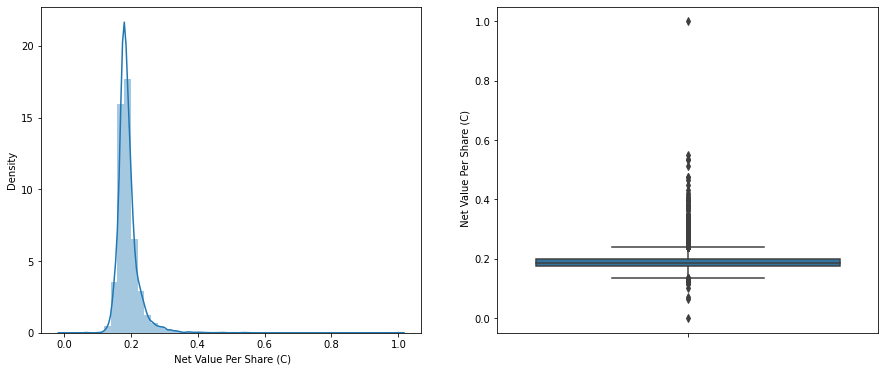

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


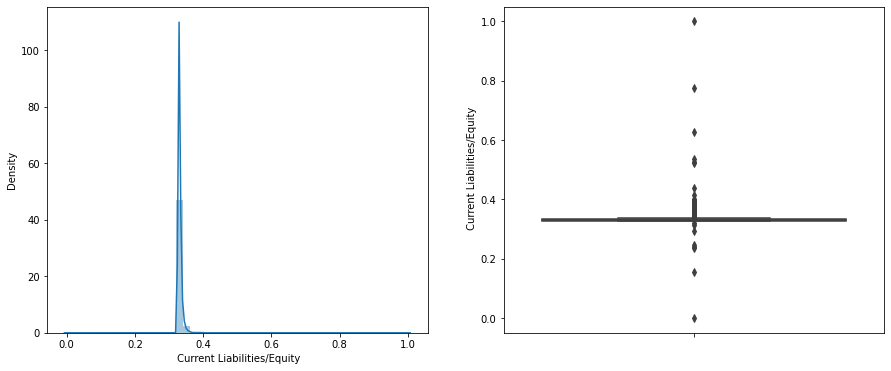

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


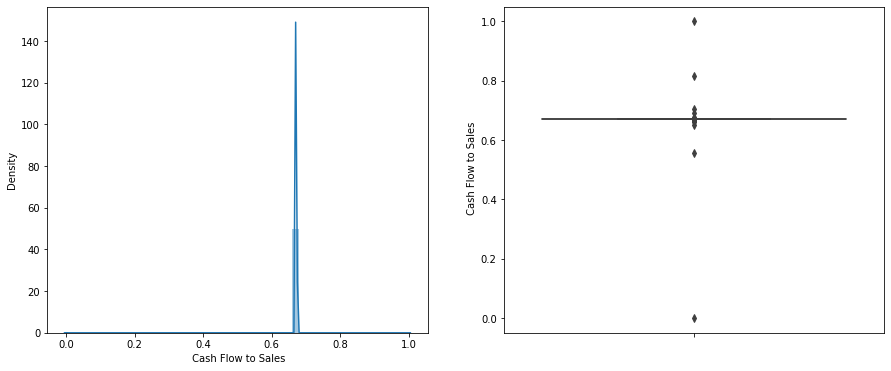

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


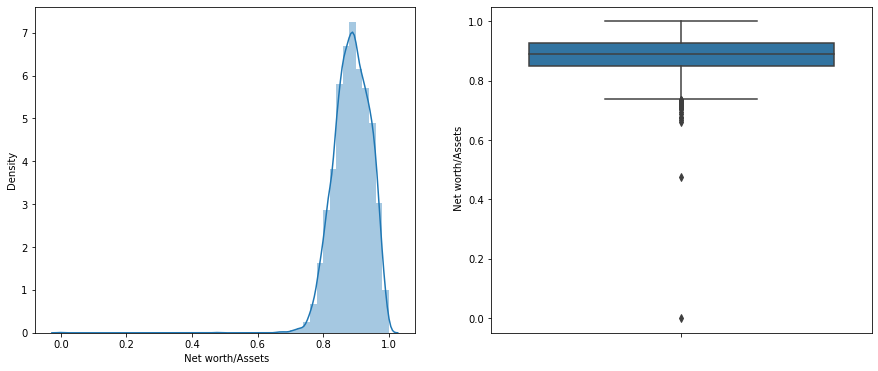

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


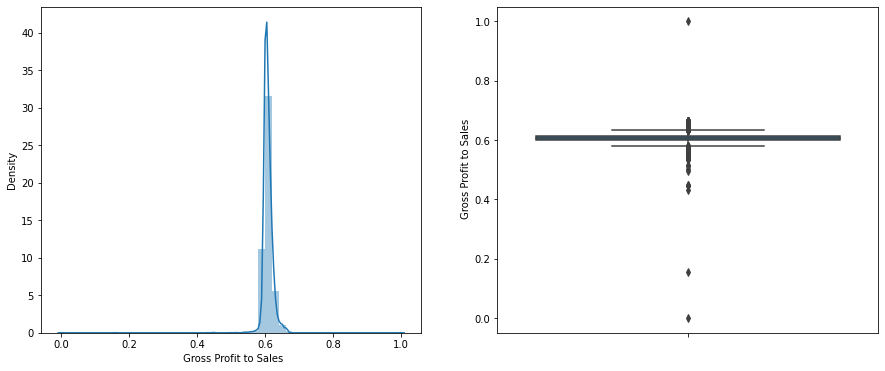

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


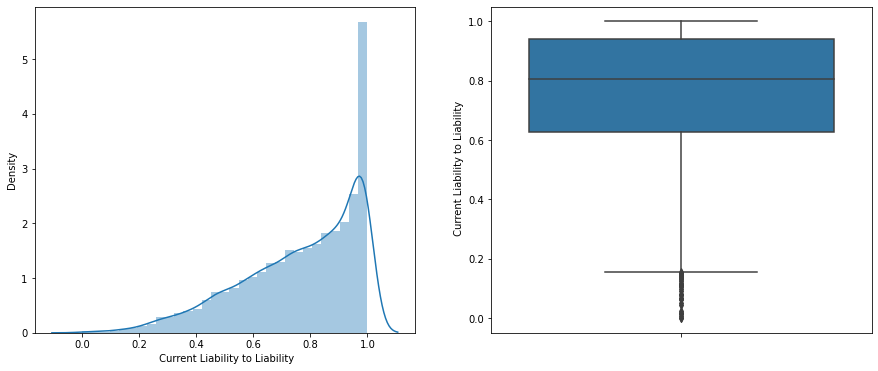

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


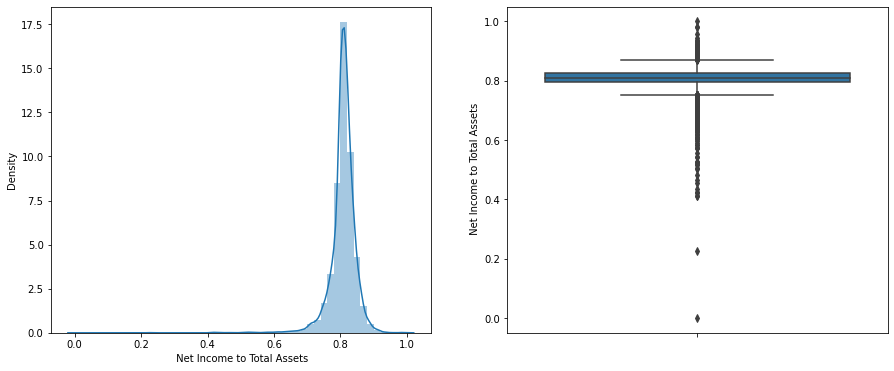

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


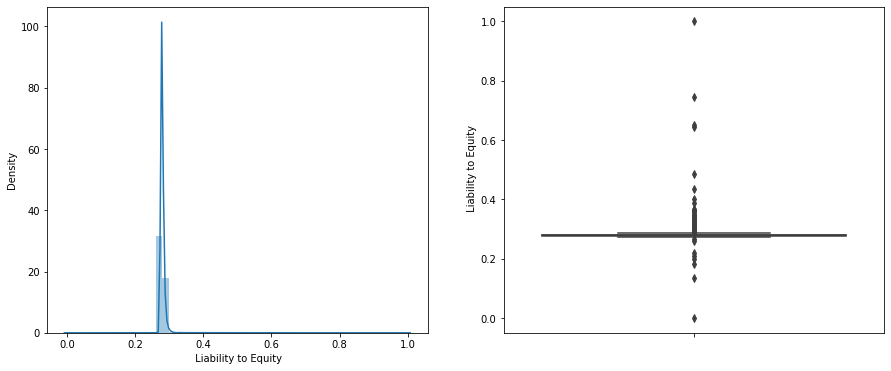

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


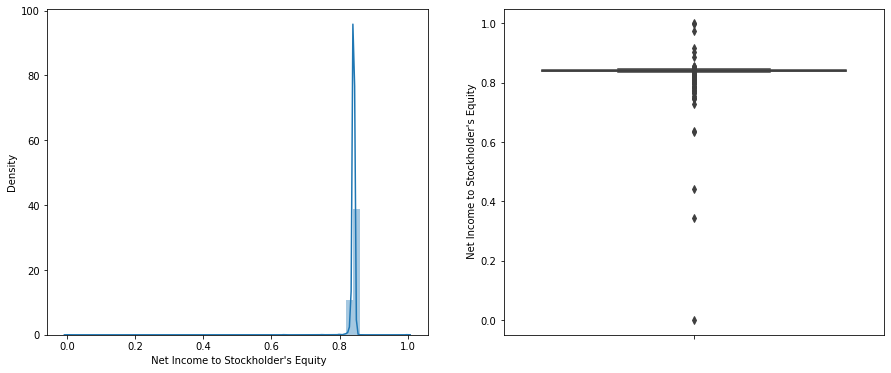

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


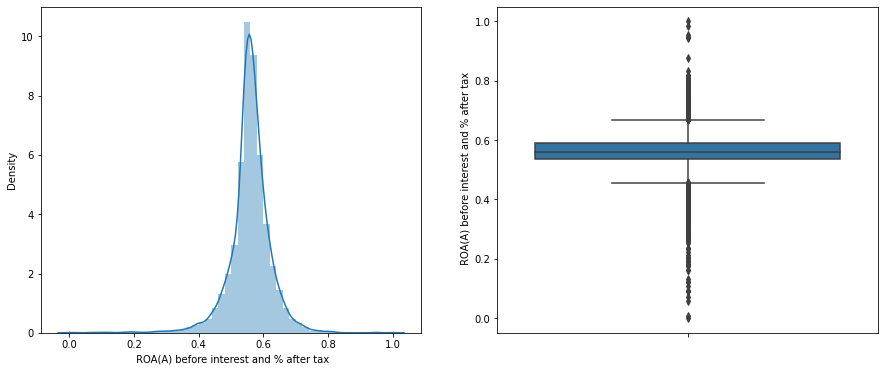

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


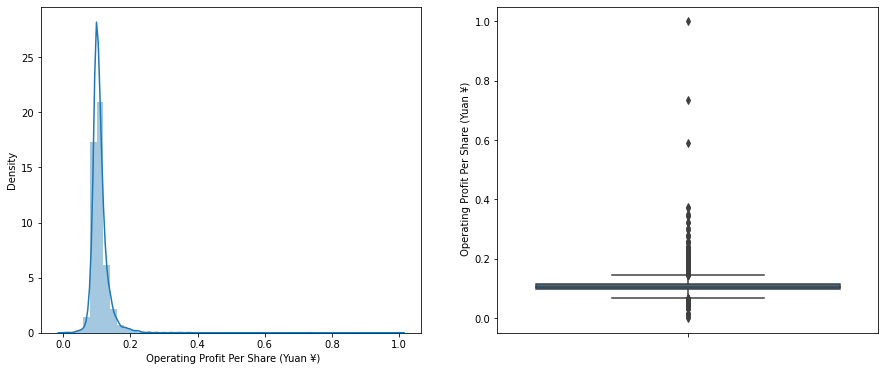

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


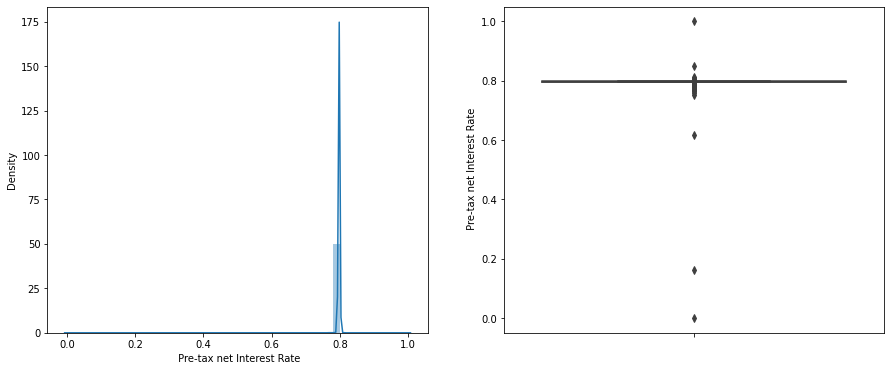

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


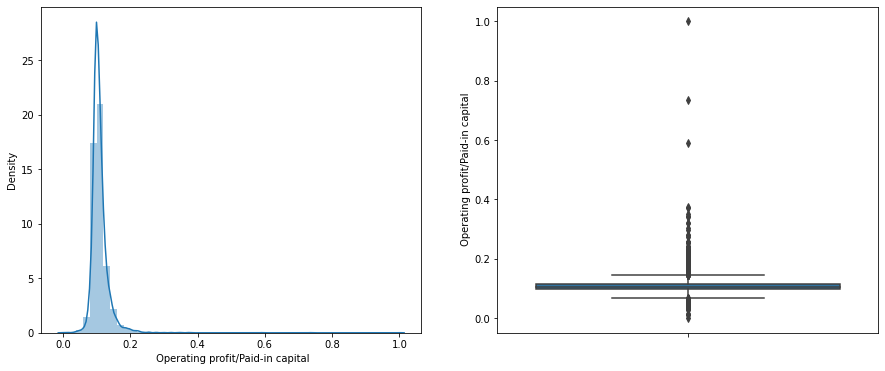

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


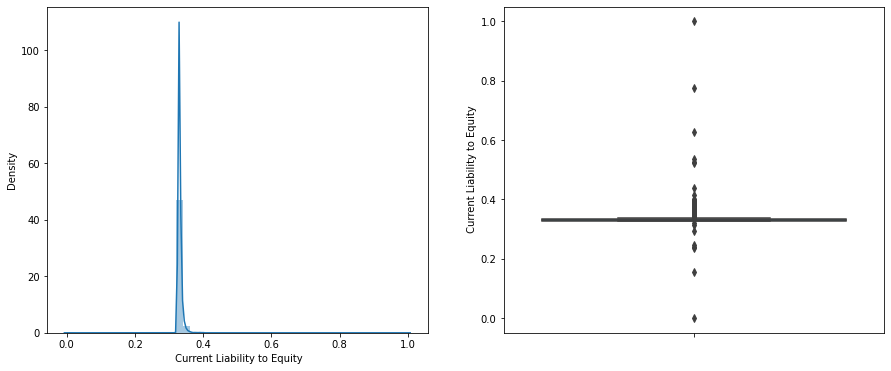

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


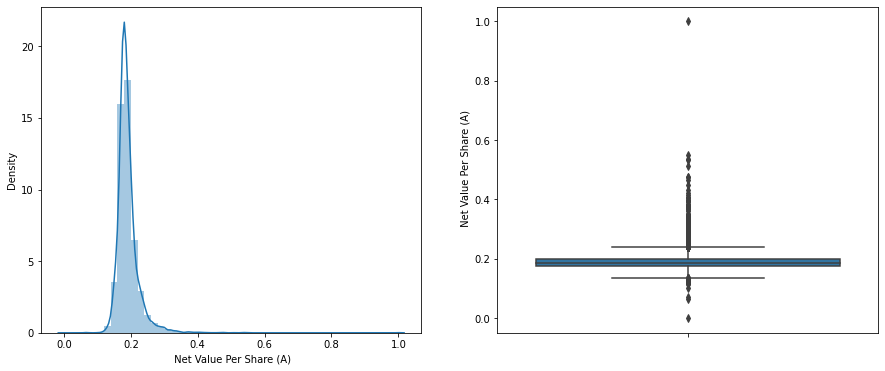

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


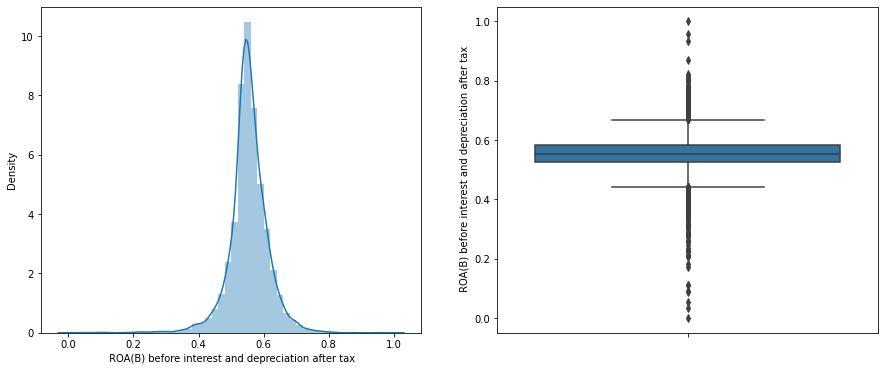

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


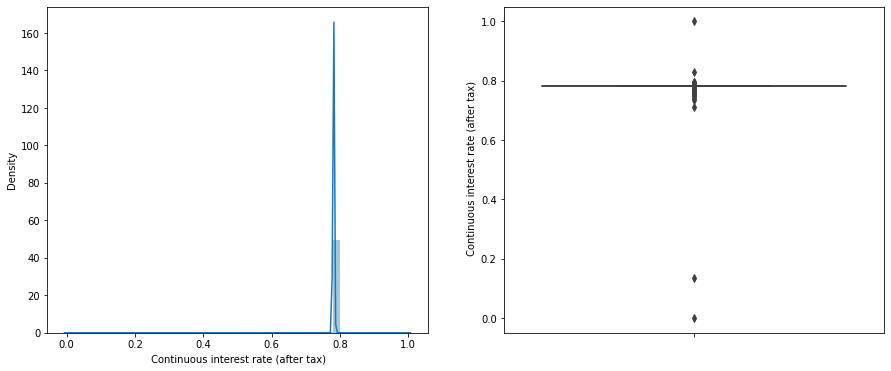

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


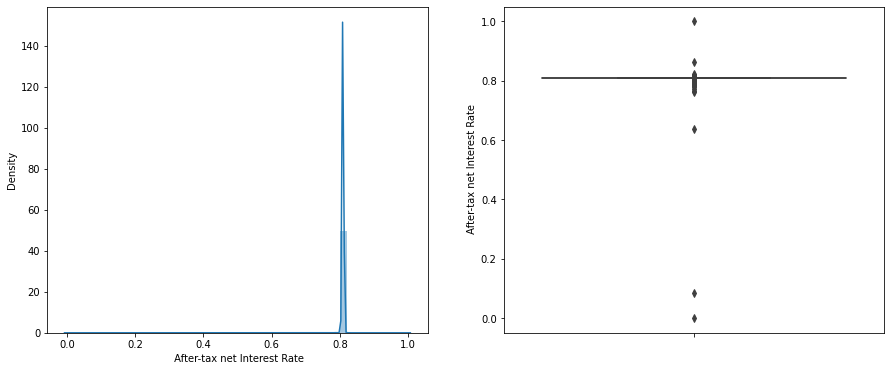

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


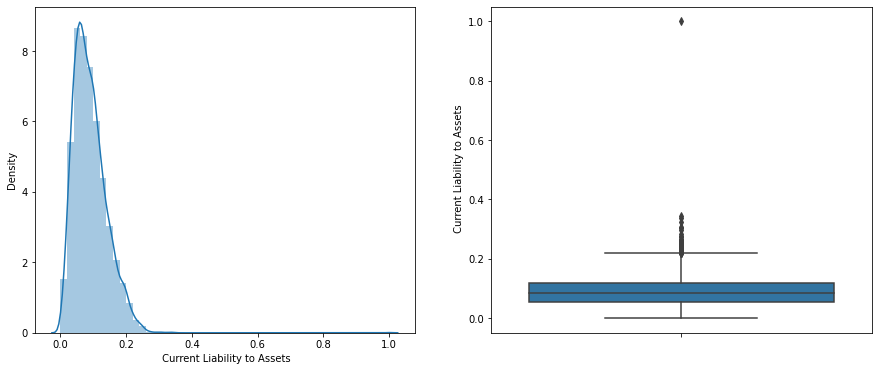

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


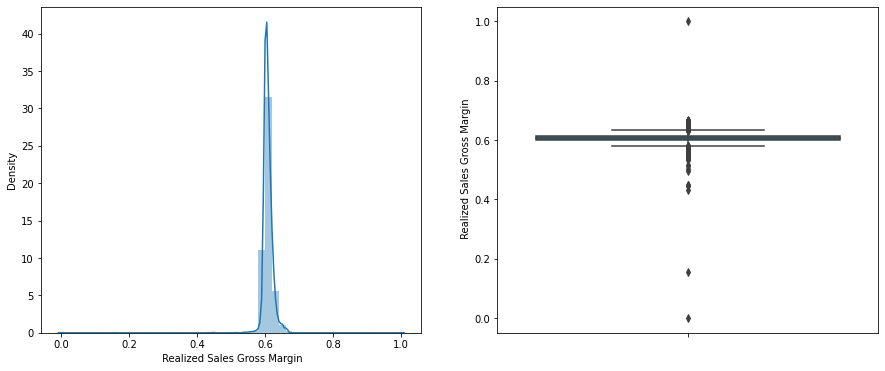

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


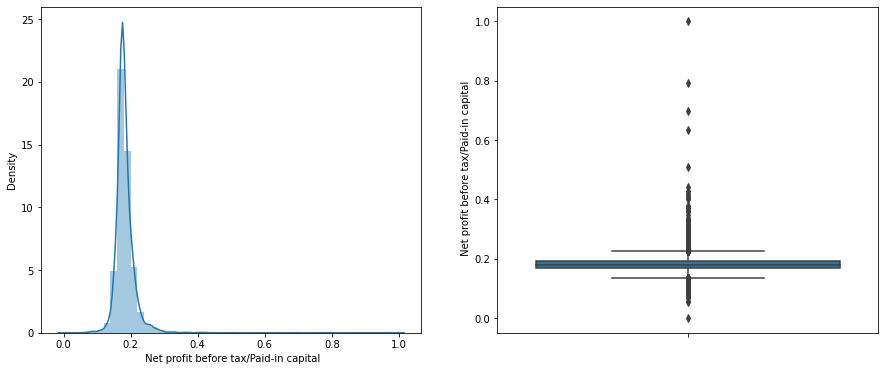

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


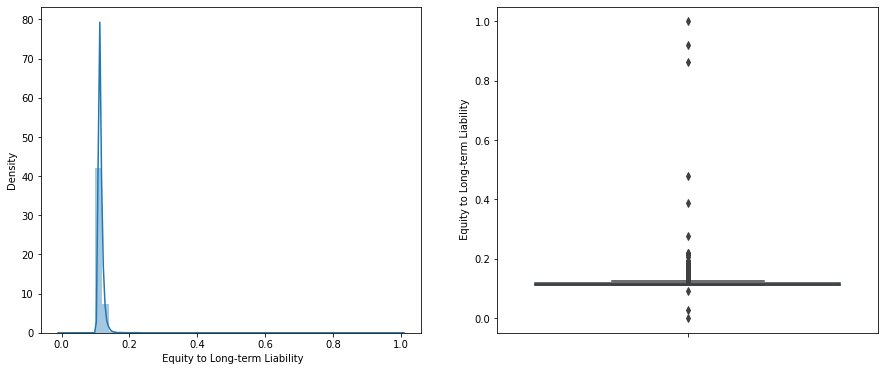

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


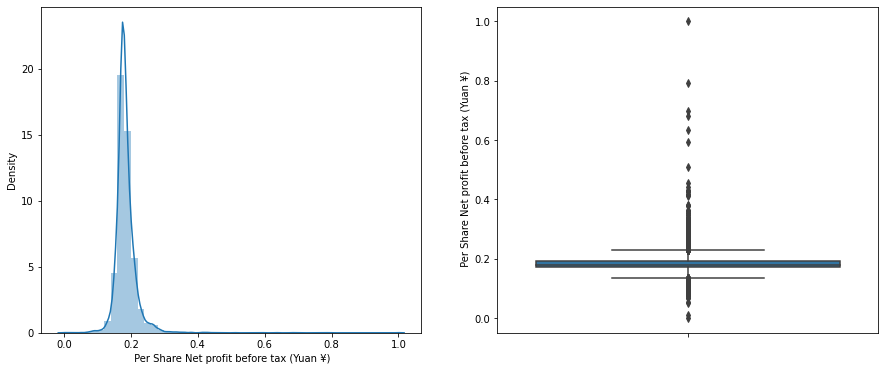

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


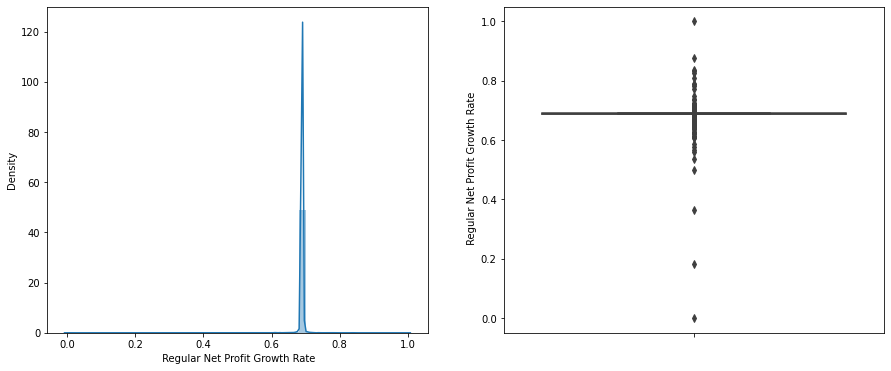

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


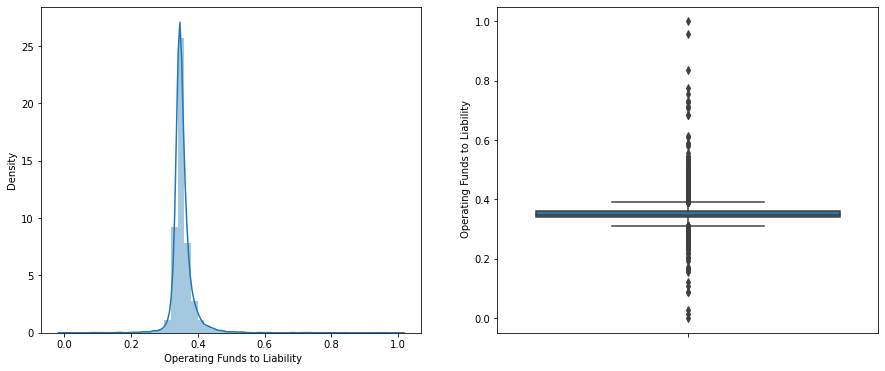

In [15]:
plot()

Conclusions:</br>
1.The data has many outliers and it can be seen that it is very skewed.</br>
2. Many columns are highly skewed, both in left and right direction.
3. We found that a lot of columns have high kurtosis.
4. A company is more likely to go bankrupt, if the value of features such as ROA(A) value is low.
5. Only for higher values of features like Retained Earnings to Total Assets, a company is likely affluent(safe).

<h3>Removing Outliers.

In [16]:
for col in corr_features:
  upper_lim = df[col].quantile(.80)
  lower_lim = df[col].quantile(0.20)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


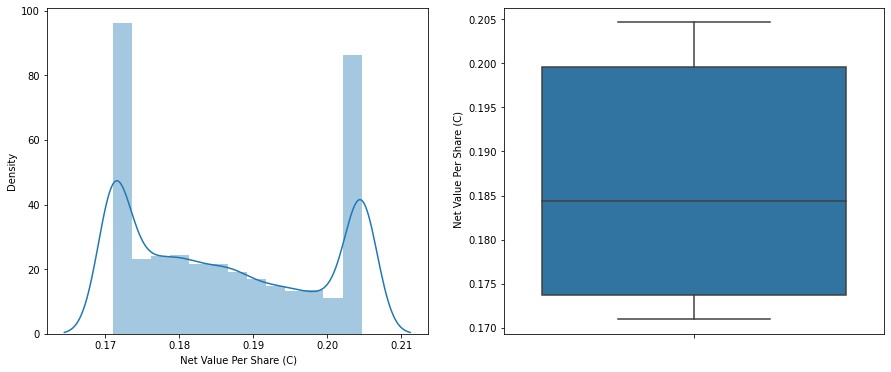

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


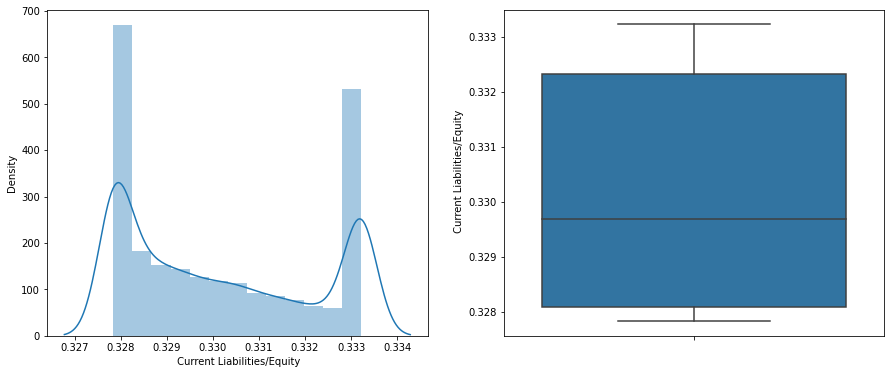

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


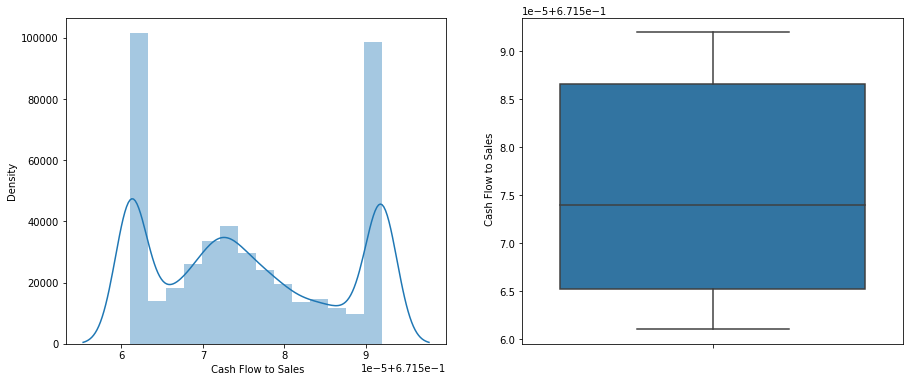

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


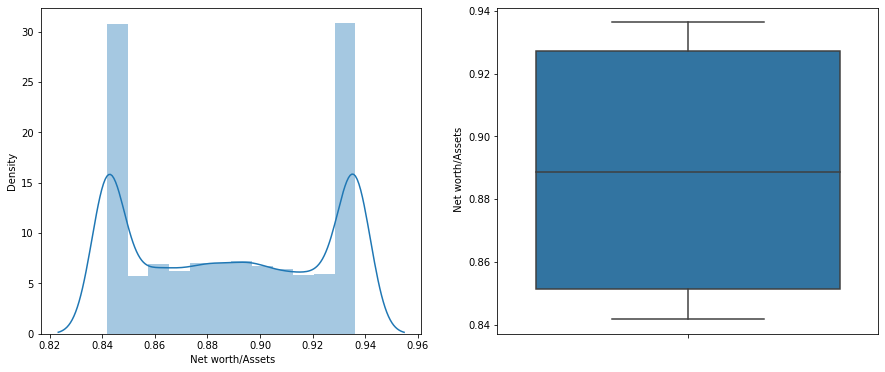

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


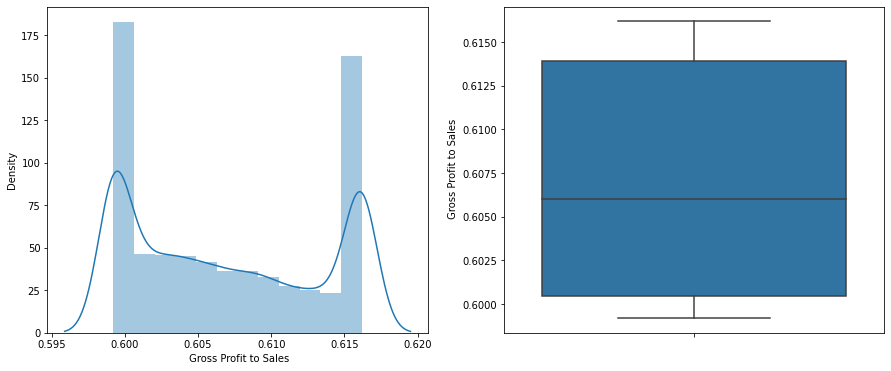

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


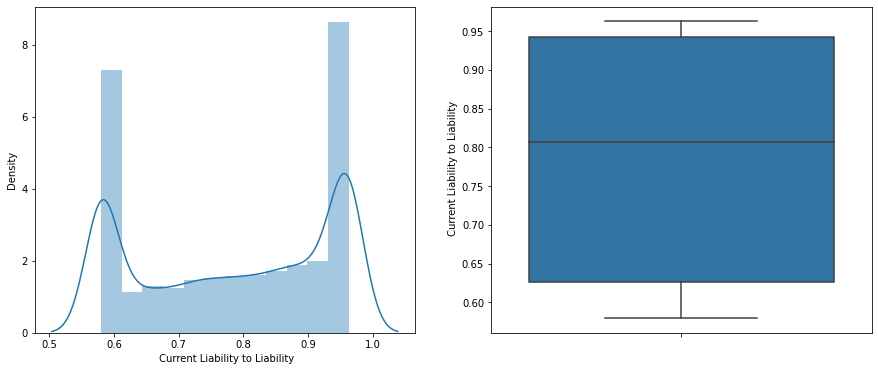

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


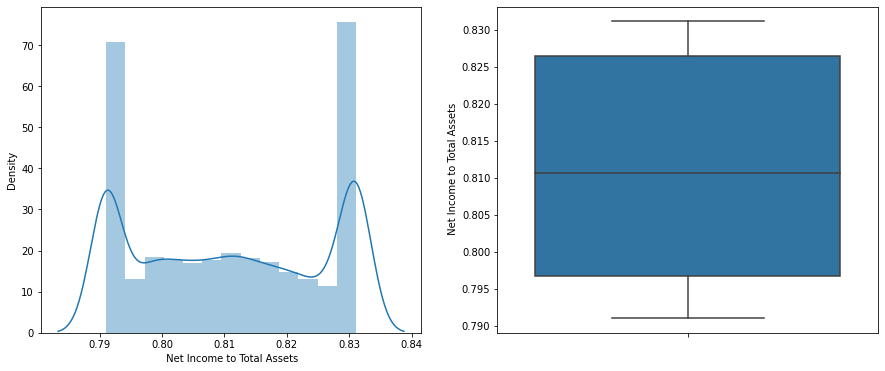

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


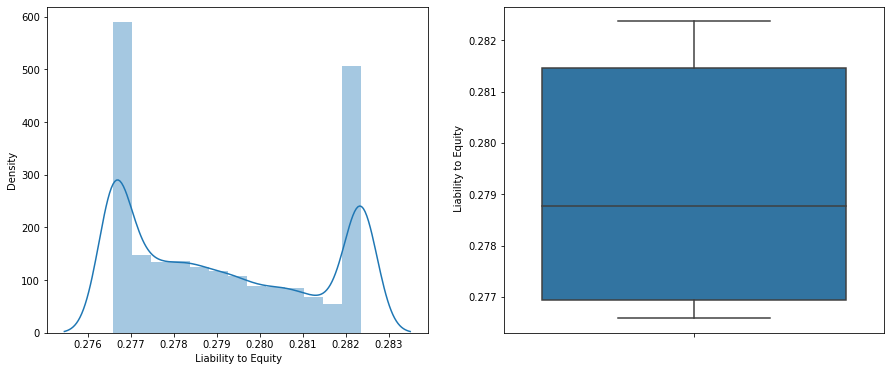

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


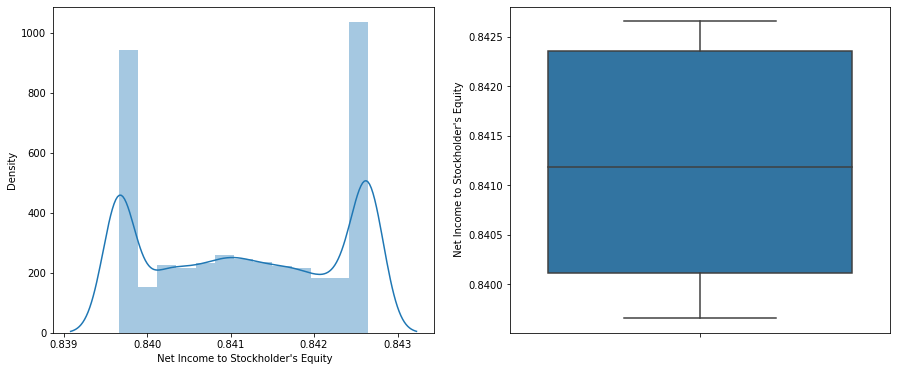

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


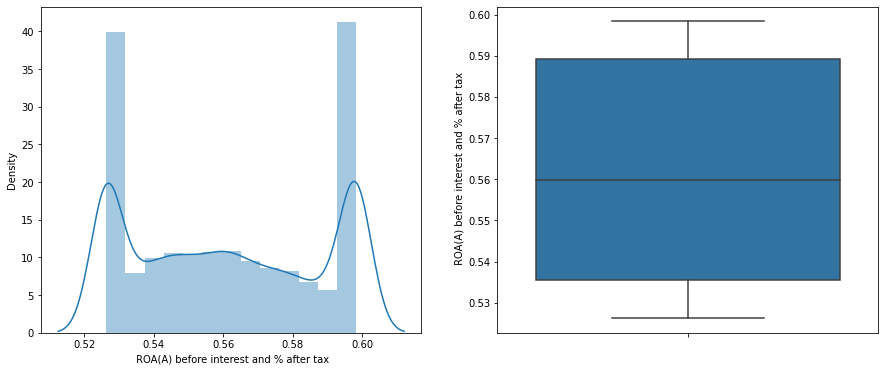

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


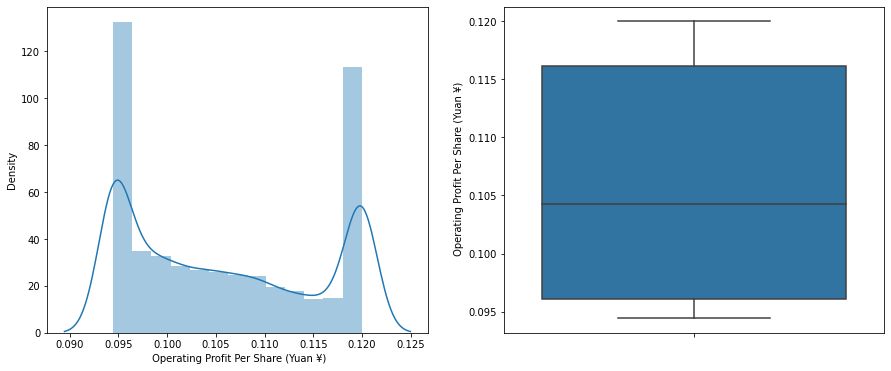

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


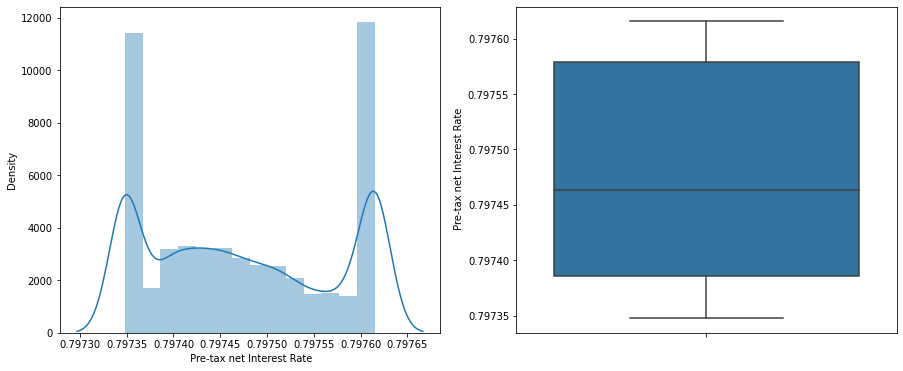

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


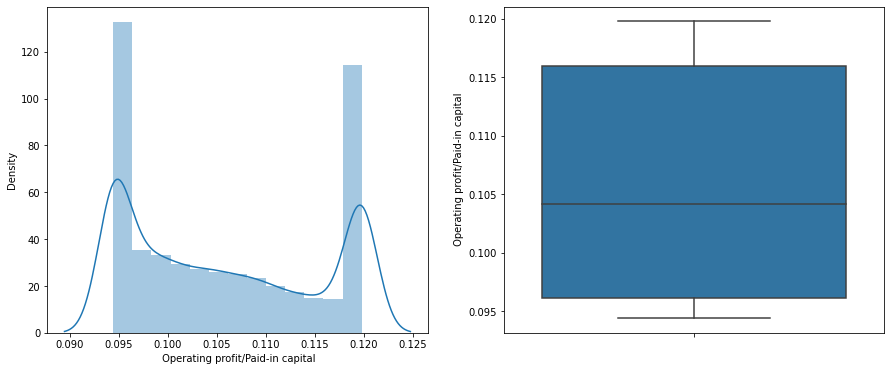

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


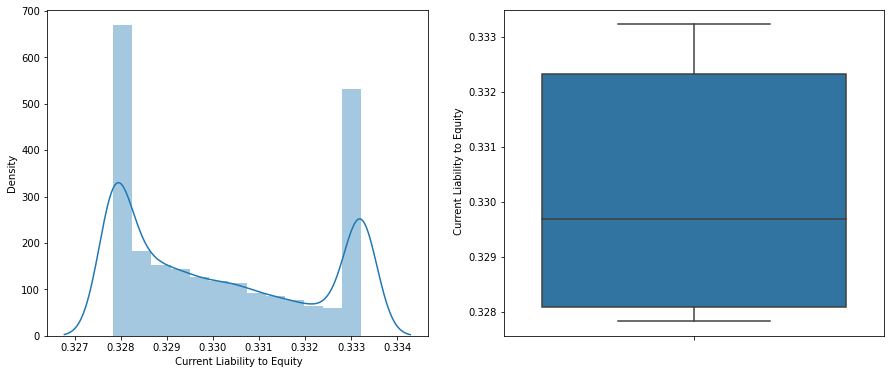

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


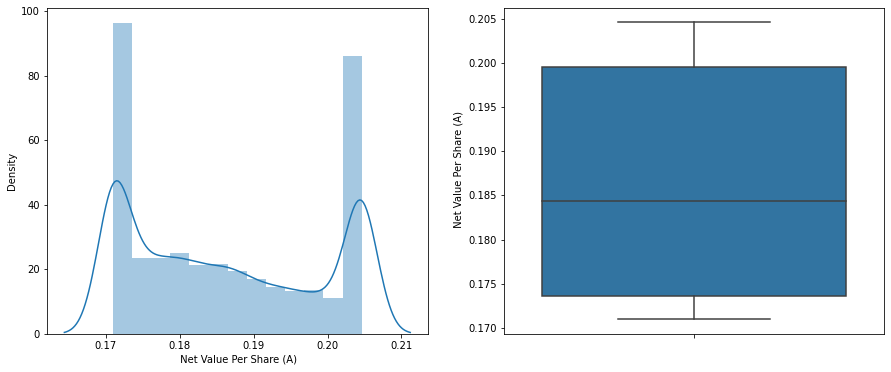

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


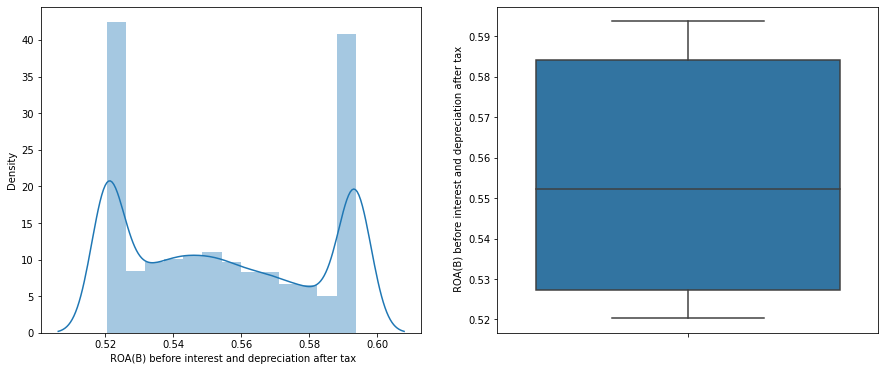

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


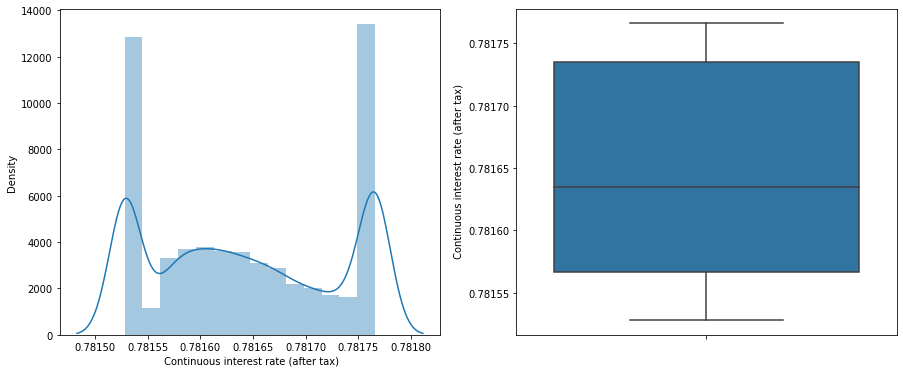

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


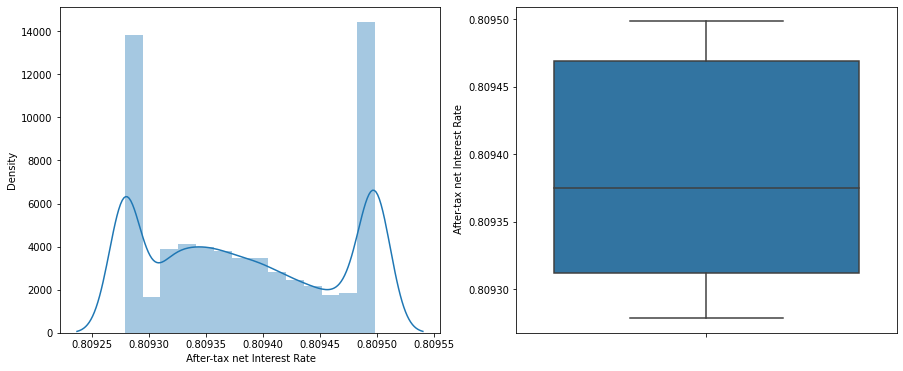

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


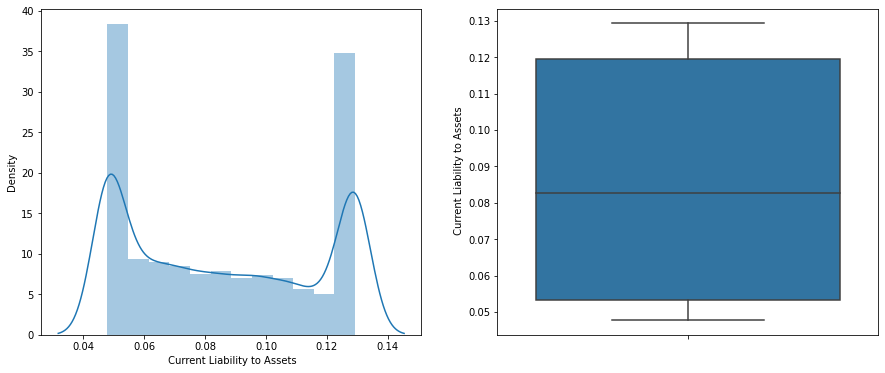

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


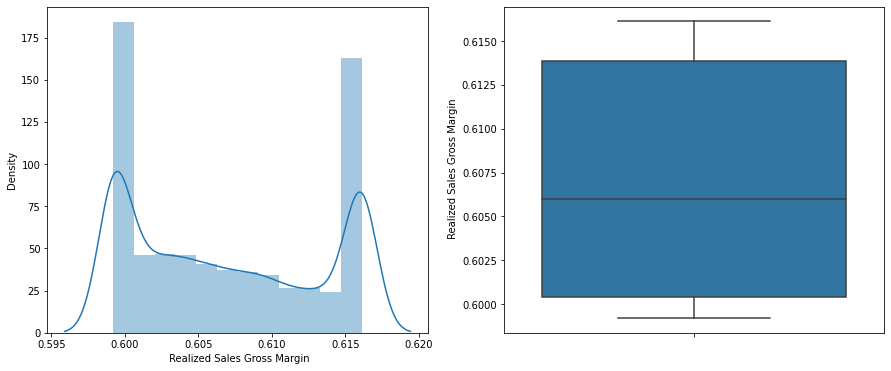

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


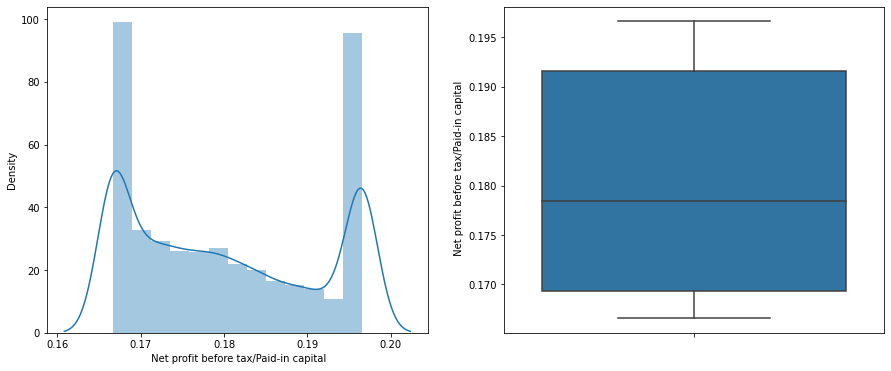

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


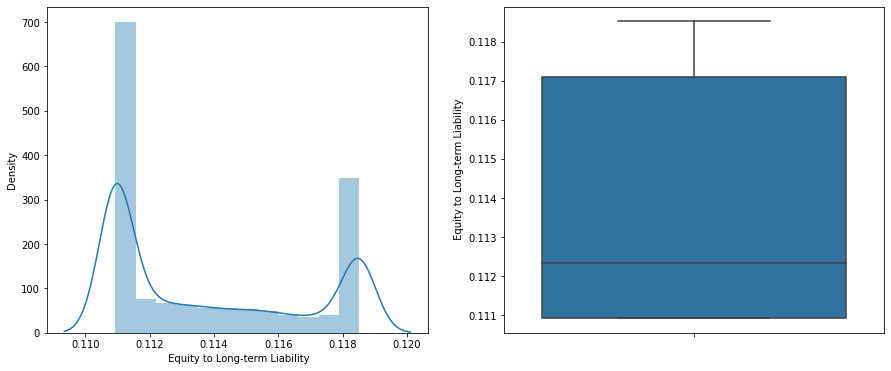

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


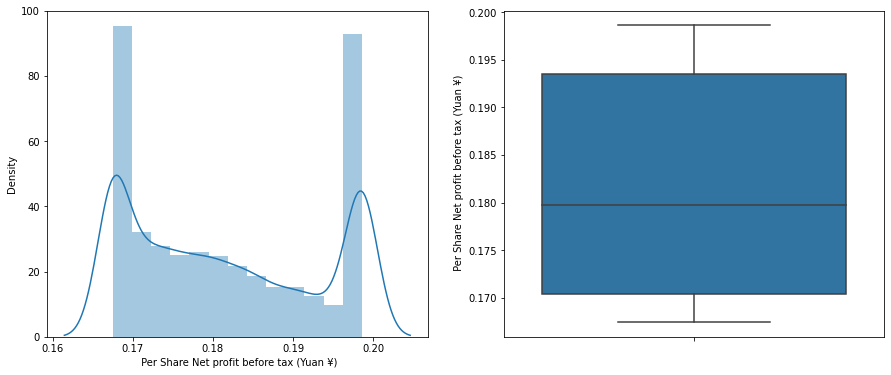

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


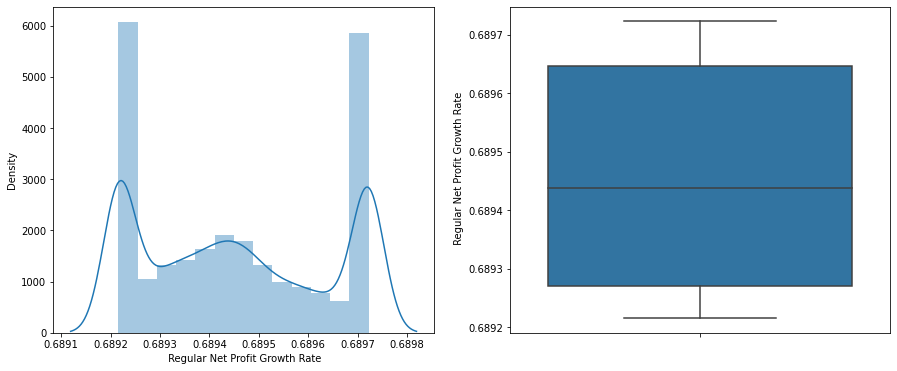

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


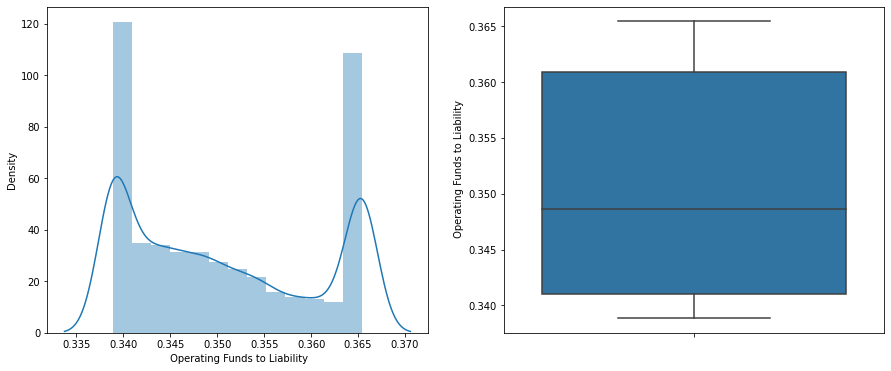

In [17]:
plot()

Now, many columns do have the normal distribution also the outliers are removed from most of the features.

#Model Testing

In [18]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.526308,0.520370,0.601457,0.601457,0.998969,0.797348,0.809279,0.302646,0.781528,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.170983,0.171000,0.169141,0.311664,0.017560,0.095921,0.167478,0.022102,0.848195,0.688979,0.689216,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.841763,0.005024,0.390284,0.006479,0.095885,0.166618,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.129243,0.338873,0.276920,0.001036,0.676269,0.721275,0.333224,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.333224,0.118514,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.791025,0.009219,0.622879,0.601453,0.839659,0.282365,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.520370,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781528,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.094455,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.841763,0.005059,0.376760,0.005835,0.094427,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [19]:
#defining dependent and independent variables
x = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

In [20]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

<h4>Checking for percentage distribution of Dependent variable in train and test set

In [21]:
y_train.value_counts()

0    5281
1     174
Name: Bankrupt?, dtype: int64

In [22]:
y_test.value_counts()

0    1318
1      46
Name: Bankrupt?, dtype: int64

In [23]:
46/(1318+46)

0.03372434017595308

In [24]:
174/(174+5281)

0.03189734188817599

It's almost same. Hence we can say it's good and we can proceed further.

In [25]:
# Applying StandardScaler as to normalize the train data and test data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# x_train_norm = scaler.fit_transform(x_train)
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score


In [30]:
# *Converting Dataset using StandardScalar:-*

# *Building Isolation Forest Model in UnSupervised Setting:-*

clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=0, verbose=0, contamination=0.033)
clf.fit(x_train_norm)

#Train Prediction
pred_train = clf.predict(x_train_norm)
print('accuracy score = ',accuracy_score(y_train,pred_train))
np.unique(pred_train, return_counts=True)
# target_names = ['bankrupt_company', 'normal_company']
print(classification_report(y_train, pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_train, pred_train)))
cm = confusion_matrix(y_train, pred_train )

#Test Prediction
pred_test = clf.predict(x_test_norm)
print('accuracy score = ',accuracy_score(y_test,pred_test))
print(classification_report(y_test, pred_test))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, pred_test)))
cm2 = confusion_matrix(y_test, pred_test)


accuracy score =  0.02914757103574702
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5281
           1       0.03      0.91      0.06       174

    accuracy                           0.03      5455
   macro avg       0.01      0.30      0.02      5455
weighted avg       0.00      0.03      0.00      5455

AUC:  47.3%
accuracy score =  0.028592375366568914
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1318
           1       0.03      0.85      0.06        46

    accuracy                           0.03      1364
   macro avg       0.01      0.28      0.02      1364
weighted avg       0.00      0.03      0.00      1364

AUC:  44.1%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [31]:
print(x_test_norm)
print(x_train_norm)

[[-0.39519174 -1.30219923 -1.25087702 ... -0.05510627  0.
   0.06067992]
 [-0.04903604 -0.12693624 -0.08335037 ... -0.01844023  0.
  -0.18660137]
 [ 0.21528616 -0.88556302  0.17567045 ...  0.01565986  0.
   0.54779735]
 ...
 [ 0.18173442  0.43087757  0.41536135 ... -0.01462277  0.
  -0.07159416]
 [-0.51794198 -0.8531084  -1.06144389 ...  0.18118701  0.
  -0.21262204]
 [ 0.79957733  1.37692979  1.39732085 ... -0.00706564  0.
  -0.37265866]]
[[-3.74733362e-01 -4.71766597e-01 -6.38118824e-01 ...  3.82472078e-01
   0.00000000e+00 -4.00179045e-01]
 [-1.59511264e-01  2.92516241e-02 -4.13891852e-01 ... -2.64053555e-03
   0.00000000e+00 -3.70436690e-01]
 [ 4.93520047e-01  9.03497994e-01  9.21805030e-01 ...  1.19519613e-02
   0.00000000e+00 -2.35023257e-01]
 ...
 [ 6.93193781e-01  1.37692979e+00  1.39732085e+00 ... -1.41728777e-02
   0.00000000e+00 -8.37254353e-02]
 [ 1.15207463e-02  8.04105715e-01 -5.24225073e-02 ... -1.36999597e-02
   0.00000000e+00  3.02406428e+00]
 [ 1.46161032e+00  1.37692

<h2>1. LogisticRegression

In [32]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

#checking accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1_lr=f1_score(y_test,y_pred)*100
lra = accuracy_score(y_test,y_pred)
print('Accuracy score = ',lra)
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[1312    6]
 [  37    9]]
Accuracy score =  0.968475073313783
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.60      0.20      0.30        46

    accuracy                           0.97      1364
   macro avg       0.79      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364



<h2>2. K- Nearest Neighbours

In [33]:
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p = 2)
knn.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_knn=f1_score(y_test,y_pred)*100
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

confusion matrix:
 [[1306   12]
 [  36   10]]
accuracy score =  0.9648093841642229
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.45      0.22      0.29        46

    accuracy                           0.96      1364
   macro avg       0.71      0.60      0.64      1364
weighted avg       0.96      0.96      0.96      1364



<h2>3. Kernel SVM

In [34]:
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = svc.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_svc=f1_score(y_test,y_pred)*100

sva2 = accuracy_score(y_test,y_pred)
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix:
 [[1318    0]
 [  46    0]]
Accuracy score =  0.966275659824047
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>4. Gaussian Naive Baye's

In [35]:
#training model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = nb.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_nb=f1_score(y_test,y_pred)*100
nba = accuracy_score(y_test,y_pred)
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix:
 [[781 537]
 [  7  39]]
Accuracy score =  0.6011730205278593
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.59      0.74      1318
           1       0.07      0.85      0.13        46

    accuracy                           0.60      1364
   macro avg       0.53      0.72      0.43      1364
weighted avg       0.96      0.60      0.72      1364



<h2>5. Decision Tree

In [36]:
#training model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = dt.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_dt=f1_score(y_test,y_pred)*100

dta = accuracy_score(y_test,y_pred)
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix:
 [[1291   27]
 [  33   13]]
Accuracy score =  0.9560117302052786
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.33      0.28      0.30        46

    accuracy                           0.96      1364
   macro avg       0.65      0.63      0.64      1364
weighted avg       0.95      0.96      0.95      1364



<h2>6. Random Forest

In [37]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_rf=f1_score(y_test,y_pred)*100

rfa = accuracy_score(y_test,y_pred)
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix:
 [[1314    4]
 [  37    9]]
Accuracy score =  0.9699413489736071
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.69      0.20      0.31        46

    accuracy                           0.97      1364
   macro avg       0.83      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364



<h2> 7. XG-Boost

In [38]:
#training model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_norm,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = xgb.predict(x_test_norm)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
f1_xgb=f1_score(y_test,y_pred)*100
xgba = accuracy_score(y_test,y_pred)
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))

Confusion matrix:
 [[1301   17]
 [  35   11]]
Accuracy score =  0.9618768328445748
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.39      0.24      0.30        46

    accuracy                           0.96      1364
   macro avg       0.68      0.61      0.64      1364
weighted avg       0.95      0.96      0.96      1364



<h2> 8. Bar Chart for comparing accuracies.

In [39]:
#comparing accuracies
def accuracy_chart(x_label,y_label):
  plt.figure(figsize= (8,7))
  sns.barplot(x = x_label,y = y_label,palette='pastel')
  plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [40]:
ac = [lra,knna,sva2,nba,dta,rfa,xgba]
name = ['Logistic Regression','knn','Kernel Svm','Naive Bayes','Decision Tree', 'Random Forest','XGBoost']

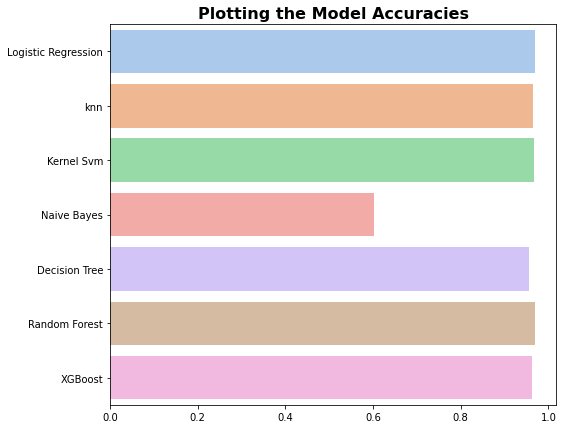

In [41]:
accuracy_chart(ac,name)

**Random forest did best with a accuracy score of 97.2%**

<h2> 9. Bar Chart for comparing F1-score.

In [42]:
#comparing f1_score
def f1score_chart(x_label,y_label):
  plt.figure(figsize= (8,7))
  sns.barplot(x = x_label,y = y_label,palette='pastel')
  plt.title("Plotting the Model F1_scores", fontsize=16, fontweight="bold")

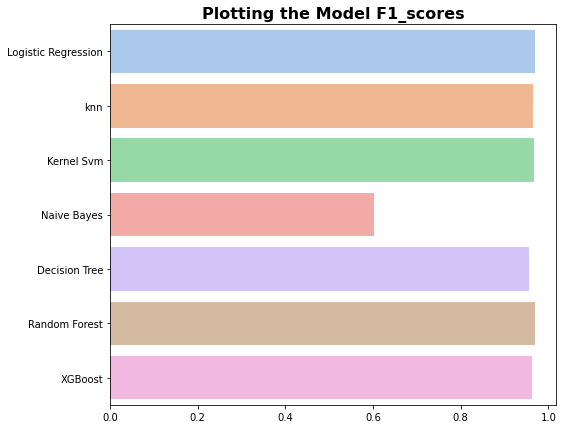

In [43]:
f1score_chart(ac,name)

**Random forest did best with a f1-score of 98.1%**